This program graphs the win probability of the home team for any game.

In [1]:
# Import Pandas, Matplotlib, and read the hockey data.
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("Subset_Hockey_Data.csv")
df.head()

,homeTeamCode,awayTeamCode,game_id,time,timeUntilNextEvent,period,team,SOG DIF,stdev,event,...,isHomeTeam,shotWasOnGoal,teamCode,isPenalty,TransitionState,isHomeWin,isHomeLoss,JacobMilesTransitions,WillTrans,WillCurrentTrans
0,MTL,TOR,20001,0,0,1,NaN,0,0,GAMESTART,...,0,0,NaN,0,"0,5,5",0,0,0,"0,0",0
1,MTL,TOR,20001,74,74,1,AWAY,-1,0,MISS,...,0,0,TOR,0,"0,5,5",0,0,"0,5,5","0,0","0,0"
2,MTL,TOR,20001,383,309,1,HOME,PENALTY,0,PENALTYSTART,...,1,0,MTL,1,"0,4,5",0,0,0,"0,-1",0
3,MTL,TOR,20001,396,13,1,AWAY,0,0,SHOT,...,0,1,TOR,0,"0,4,5",0,0,"0,4,5","0,-1","0,-1"
4,MTL,TOR,20001,438,42,1,HOME,PENALTY,0,PENALTYSTART,...,1,0,MTL,1,"0,3,5",0,0,"0,3,5","0,-2","0,-2"


In [3]:
# Create the df that contains transition states for every game.
games = df.game_id.unique()
print(games)
df_single_games = pd.DataFrame()
for i in range(len(games)):
    df_single_games[games[i]] = df.loc[df["game_id"] == games[i]]["TransitionState"].reset_index(drop = True)  

[20001 20002 20003 ... 21228 21229 21230]


In [3]:
# Create the df that contains time of events for every game.
df_single_times = pd.DataFrame()
for i in range(len(games)):
    df_single_times[games[i]] = df.loc[df["game_id"] == games[i]]["time"].reset_index(drop = True)

In [4]:
# Function used to create df_trans_lambda
def get_state_one(transitions):
    return transitions.split(">")[0]
def get_win_id(state):
    for s in unique_state_one:
        if s == state:
            return unique_state_one.index(s) + 1

In [5]:
# Create a list of unique state ones 


# Create df that holds every transitions (s1>s2) and win ID of state one
df_trans_lambda = pd.read_csv("TransitionsLambdas.csv")
df_trans_lambda["StateOne"] = df_trans_lambda.Transitions.apply(get_state_one)
unique_state_one = list(df_trans_lambda.StateOne.unique())
state_winID = {x:unique_state_one.index(x) + 1 for x in unique_state_one}
df_trans_lambda["WinID"] = df_trans_lambda.StateOne.apply(get_win_id)
win_ids = list(df_trans_lambda.WinID.unique())

In [6]:
# Def to swap state for win ID. Used in creating df_win_time
def swap_state_win(state):
    return state_winID.get(state)

In [10]:
# Create df that contains win ID and Time for a singular game
a = 3
game = 20000 + a
df_win_time = pd.DataFrame()
df_win_time["WinID"] = (df_single_games[game].apply(swap_state_win))
df_win_time["Time"] = df_single_times[game].reset_index(drop = True)
df_win_time.dropna(axis = 0, inplace = True)

NameError: name 'df_single_times' is not defined

In [8]:
# Print column defining statements to a txt file.
f1 = open("col_printer.txt", "w")
def col_printer(win):
    for ident in win:
        f1.write("col" + str(ident) + " =y(:," + str(ident) + ");\n")
col_printer(win_ids)
f1.close()

In [9]:
# print fprint statements to a txt file.
f2 = open("fprinter.txt","w")
def fprinter(vec):
    win = (str((vec[0])).split(".")[0])
    time = (str((vec[1])).split(".")[0])
    f2.write("\n" + "fprintf('" + time + "\\t%2.15f\\n'," + "col" +  win + "("  + time + ")" + ")")
df_win_time[["WinID","Time"]].apply(fprinter, axis = 1)
f2.close()

KeyError: "['Time'] not in index"

In [11]:
# Create the text file for Harvey to run.
f3 = open("harveyHockey_p1.txt","r")
f4 = open("col_printer.txt","r")
f5 = open("fprinter.txt","r")
f6 = open("HockeyGameMatlab.txt", "w")
lines3 = f3.readlines()
for line in lines3:
    f6.write(line)
lines4 = f4.readlines()
for line in lines4:
    f6.write(line)
lines5 = f5.readlines()
for line in lines5:
    f6.write(line)
game_id = "\n" + "# game_id = " + str(game)
f6.write(game_id)
f3.close()
f4.close()
f5.close()
f6.close()

In [12]:
# 
f7 = open("game_20003_time_prob.txt","r")
time = []
prob = []
lines7 = f7.readlines()
for line in lines7:
    parts = line.split("\t")
    time.append(int(parts[0]))
    prob.append(float(parts[1].replace(" ", "").strip("\n")))

[Text(0.5, 1.0, 'EDM vs. WPG'),
 Text(0, 0.5, 'Home Team Win Probability'),
 Text(0.5, 0, 'Time')]

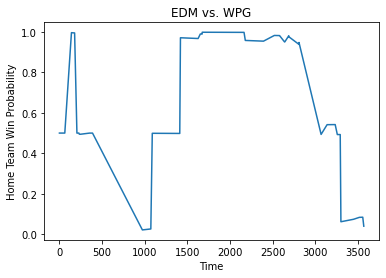

In [14]:
title = df.loc[df["game_id"] == game].reset_index(drop = True)["homeTeamCode"][0] + " vs. " + df.loc[df["game_id"] == game].reset_index(drop = True)["awayTeamCode"][0]
fig, ax = plt.subplots()
plt.plot(time,prob)
ax.set(title = title, ylabel = "Home Team Win Probability", xlabel = "Time")